## Customer Segmentation Project

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.



# Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Capstone-Projects/1_EU_DS_Capstone_Projects_(Customer_Segmentation)/Online Retail.xlsx")

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


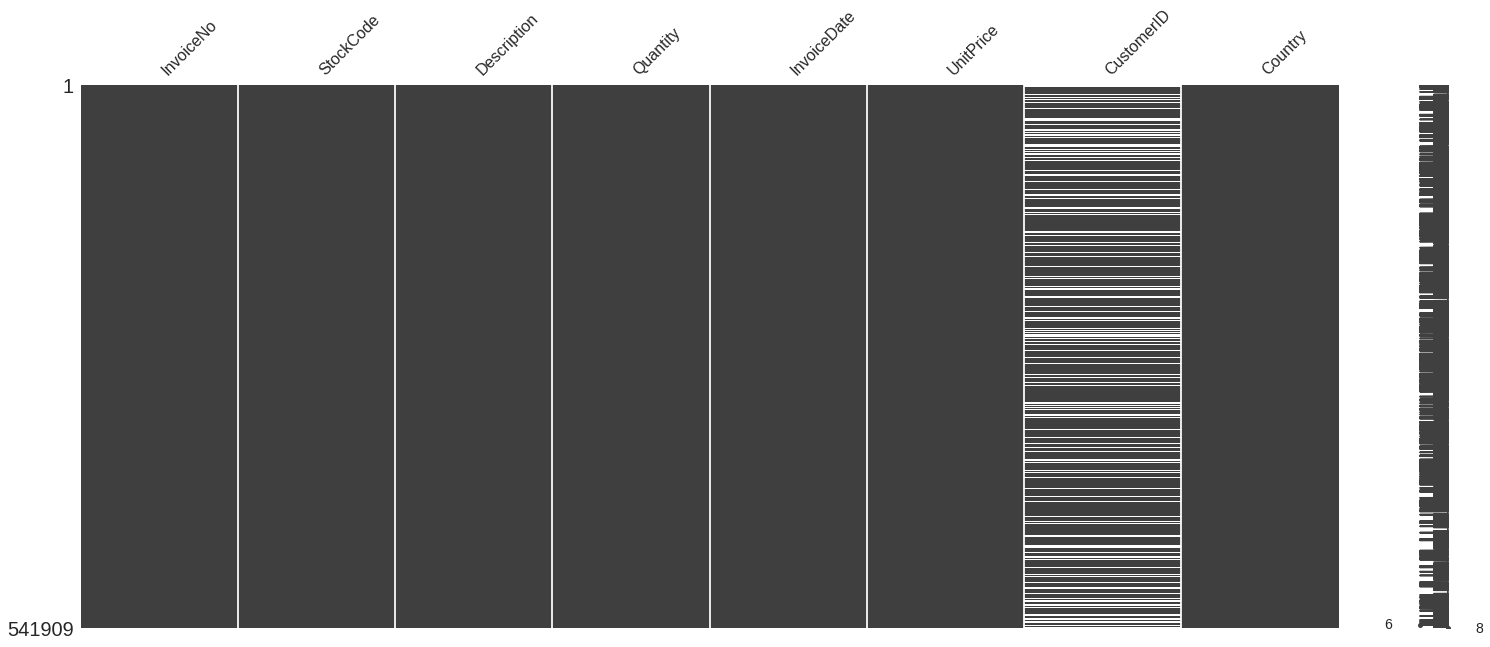

In [157]:
import missingno
missingno.matrix(df)

In [158]:
df["CustomerID"]=df["CustomerID"].astype("str")

We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out.

In [159]:
df[df["InvoiceNo"].str.contains("C", na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [160]:
df[df["InvoiceNo"].str.contains("C", na=False)].InvoiceNo.count()

9288

#### 9288 or about 36% of the orders were cancelled. Looking deeper into why these orders were cancelled may prevent future cancellations. Now let's find out what a negative UnitPrice means.


In [161]:
df=df[~df["InvoiceNo"].str.contains("C", na=False)]
df.shape

(532621, 8)

In [162]:
df[df.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,nan,United Kingdom


In [163]:
df=df[df.UnitPrice>0]

In [164]:
df.shape

(530104, 8)

### iii. Handling Missing Values

In [165]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### iv. Clean the Data from the Noise and Missing Values

In [166]:
df=df.dropna()

In [167]:
df.shape

(530104, 8)

### v. Explore the Orders


1. Find the unique number of InvoiceNo  per customer

In [168]:
df.groupby("CustomerID").InvoiceNo.nunique()

CustomerID
12346.0       1
12347.0       7
12348.0       4
12349.0       1
12350.0       1
           ... 
18281.0       1
18282.0       2
18283.0      16
18287.0       3
nan        1428
Name: InvoiceNo, Length: 4339, dtype: int64

2. What's the average number of unqiue items per order or per customer?

In [169]:
df.groupby("CustomerID",).InvoiceNo.nunique().mean()

4.6001382807098405

3. Let's see how this compares to the number of unique products per customer.

In [170]:
df.groupby("CustomerID").Description.nunique()

CustomerID
12346.0       1
12347.0     103
12348.0      22
12349.0      73
12350.0      17
           ... 
18281.0       7
18282.0      12
18283.0     272
18287.0      59
nan        3371
Name: Description, Length: 4339, dtype: int64

### vi. Explore Customers by Country

1. What's the total revenue per country?

In [171]:
df["TotalSum"] = df["Quantity"] * df["UnitPrice"]

In [172]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.groupby("Country").TotalSum.sum()

Country
Australia               138521.31
Austria                  10198.68
Bahrain                    754.14
Belgium                  41196.34
Brazil                    1143.60
Canada                    3666.38
Channel Islands          20450.44
Cyprus                   13590.38
Czech Republic             826.74
Denmark                  18955.34
EIRE                    283453.96
European Community        1300.25
Finland                  22546.08
France                  209715.11
Germany                 228867.14
Greece                    4760.52
Hong Kong                15691.80
Iceland                   4310.00
Israel                    8135.26
Italy                    17483.24
Japan                    37416.37
Lebanon                   1693.88
Lithuania                 1661.06
Malta                     2725.59
Netherlands             285446.34
Norway                   36165.44
Poland                    7334.65
Portugal                 33747.10
RSA                       1002.31
Saudi 

2. Visualize number of customer per country

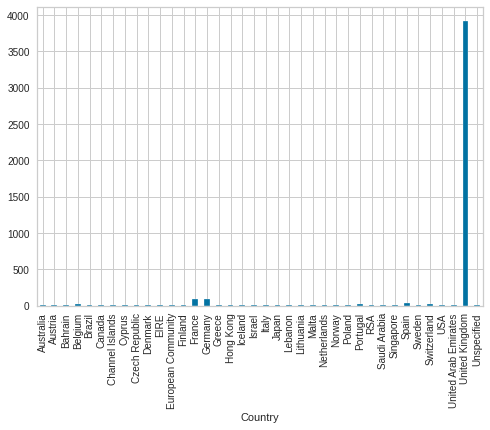

In [173]:

df.groupby("Country").CustomerID.nunique().plot(kind="bar")

3. Visualize total cost per country

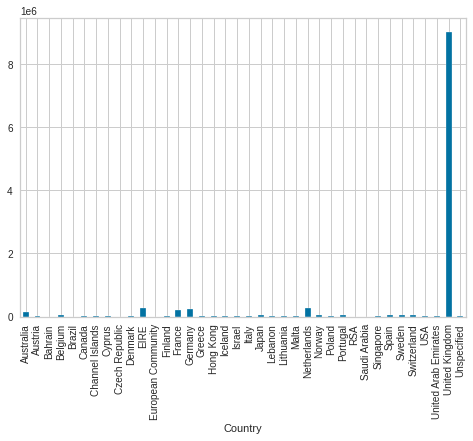

In [174]:
df.groupby("Country").TotalSum.sum().plot(kind="bar")

#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### vii. Explore the UK Market


1. Create df_uk DataFrame

In [175]:
df_uk=df[df.Country=="United Kingdom"]

In [176]:
df_uk.shape

(485123, 9)

In [177]:
df_uk=df_uk.drop_duplicates()
df_uk.shape

(479985, 9)

2. What are the most popular products that are bought in the UK?

In [178]:
df_uk.sort_values("Quantity", ascending=False)["Description"].head()

540421          PAPER CRAFT , LITTLE BIRDIE
61619        MEDIUM CERAMIC TOP STORAGE JAR
421632    WORLD WAR 2 GLIDERS ASSTD DESIGNS
206121                 SMALL POPCORN HOLDER
97432                 EMPIRE DESIGN ROSETTE
Name: Description, dtype: object

### We will continue analyzing the UK transactions with customer segmentation.

# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

In [179]:
print('Min:{}; Max:{}'.format(min(df_uk.InvoiceDate), max(df_uk.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:49:00


In [180]:
import datetime
NOW = datetime.datetime(2011,12,10)


In [181]:
rfm = df_uk.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (NOW - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename the columns 
rfm.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)
rfm.sample(5)

,Recency,Frequency,MonetaryValue
CustomerID,,,
13991.0,12,82,852.88
15130.0,169,22,330.11
16829.0,156,11,197.22
15665.0,168,115,2222.21
17967.0,371,42,112.27


# Define the snapshot date
NOW = dt.datetime(2011,11,1)

# Calculate recency by subtracting current date from the latest InvoiceDate
features = online_X.groupby('CustomerID').agg({
  'InvoiceDate': lambda x: (NOW - x.max()).days,
  # Calculate frequency by counting unique number of invoices
  'InvoiceNo': pd.Series.nunique,
  # Calculate monetary value by summing all spend values
  'TotalSum': np.sum,
  # Calculate average and total quantity
  'Quantity': ['mean', 'sum']}).reset_index()

In [182]:
r_labels = range(4, 0,-1); f_labels = range(1, 5); m_labels = range(1, 5)

r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)

f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)

m_groups = pd.qcut(rfm['MonetaryValue'], q=4, labels=m_labels)

rfm = rfm.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [183]:
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,6
12747.0,2,103,4196.01,4,4,4,12
12748.0,0,4412,33053.19,4,4,4,12
12749.0,3,199,4090.88,4,4,4,12
12820.0,3,59,942.34,4,3,3,10


2. Create a new column called Date which contains the invoice date without the timestamp

In [184]:
score_labels = ['Low', 'Middle', 'High', 'Top Class']
score_groups = pd.qcut(rfm.RFM_Score, q = 4, labels = score_labels)
rfm['RFM_Level'] = score_groups.values

rfm.sample(5)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
17569.0,332,29,344.14,1,2,2,5,Low
16594.0,75,53,181.09,2,3,1,6,Middle
17571.0,50,271,1425.67,3,4,3,10,High
12897.0,204,4,216.50,1,1,1,3,Low
13607.0,40,97,675.51,3,3,3,9,High


In [185]:
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low        189.80     14.80        258.30  1176
Middle      88.40     33.10        782.40   812
High        46.70     80.50       1521.80  1178
Top Class   12.80    451.50       8304.60   755


# 3. Applying K-Means Clustering

Now that we have our customers segmented into 6 different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

In [186]:
rfm_df=rfm.loc[:,["Recency" , "Frequency", "MonetaryValue"]]
rfm_df.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4412,33053.19
12749.0,3,199,4090.88
12820.0,3,59,942.34


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

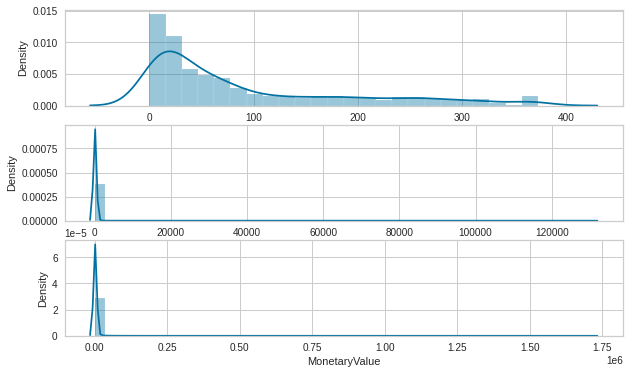

In [187]:
plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1); sns.distplot(rfm_df.Recency)
plt.subplot(3, 1, 2); sns.distplot(rfm_df.Frequency)
plt.subplot(3, 1, 3); sns.distplot(rfm_df.MonetaryValue)
plt.show()

### iii. Data Normalization

1. You can use the logarithm method to normalize the values in a column.

In [ ]:
rfm_log = np.log(rfm_df+1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)

rfm_normalized = scaler.transform(rfm_log)

rfm_normalized = pd.DataFrame(data=rfm_normalized, index=rfm_df.index, columns=rfm_df.columns)

In [189]:
rfm_normalized.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,1.44,-2.40,3.77
12747.0,-1.95,0.74,1.44
12748.0,-2.75,3.71,3.09
12749.0,-1.74,1.26,1.42
12820.0,-1.74,0.30,0.25


In [190]:
rfm_normalized.agg(["mean", "std"]).round()

,Recency,Frequency,MonetaryValue
mean,0.00,0.00,0.00
std,1.00,1.00,1.00


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

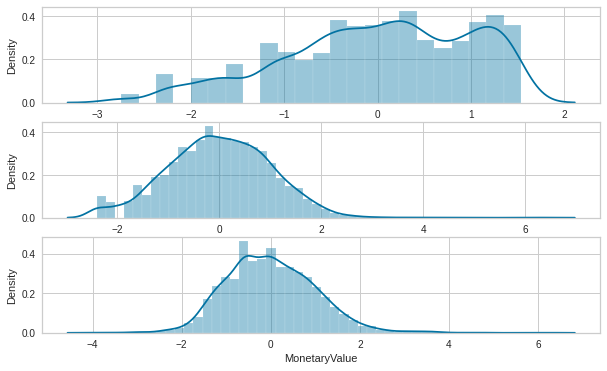

In [191]:
plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1); sns.distplot(rfm_normalized.Recency)
plt.subplot(3, 1, 2); sns.distplot(rfm_normalized.Frequency)
plt.subplot(3, 1, 3); sns.distplot(rfm_normalized.MonetaryValue)
plt.show()

## K-Means Implementation

For k-means, you have to set k to the number of clusters you want, but figuring out how many clusters is not obvious from the beginning. We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 
<br>
<br>
**Note**: K-means is sensitive to initializations because they are critical to qualifty of optima found. Thus, we will use smart initialization called "Elbow Method".

### i. Define the Optimal Number of Clusters

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

In [192]:
from sklearn.cluster import KMeans
sse={}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_

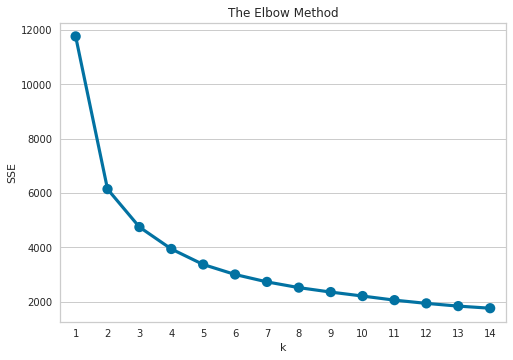

In [193]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
sns.set_style("darkgrid")
plt.show()

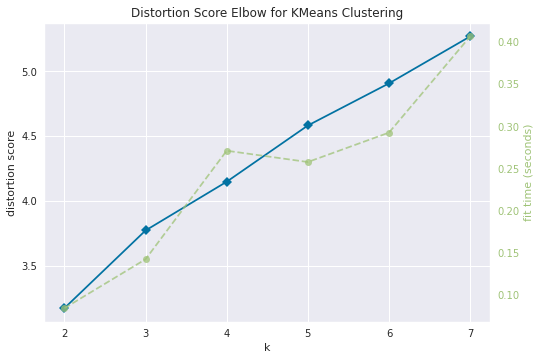

In [194]:
from yellowbrick.cluster import KElbowVisualizer
kmean = KMeans()
visu = KElbowVisualizer(kmean, k = (2,8))
visu.fit(rfm_normalized)
visu.poof()

In [195]:
!pip install pyclustertend
from pyclustertend import hopkins
hopkins(rfm_normalized, rfm_normalized.shape[0])

0.06453600159048606

[Silhouette Coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [196]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_normalized)
    
    cluster_labels = kmeans.labels_
    
    
    silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3996728782895399
For n_clusters=3, the silhouette score is 0.3074216145479797
For n_clusters=4, the silhouette score is 0.30720581258864094
For n_clusters=5, the silhouette score is 0.27553228465355817
For n_clusters=6, the silhouette score is 0.27341337371417657
For n_clusters=7, the silhouette score is 0.260506016373898
For n_clusters=8, the silhouette score is 0.25828568801783575


### ii. Model Fitting

Fit the K-Means Algorithm with the optimal number of clusters you decided and save the model to disk.

In [197]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_normalized)
y_kmeans = kmeans.predict(rfm_normalized)

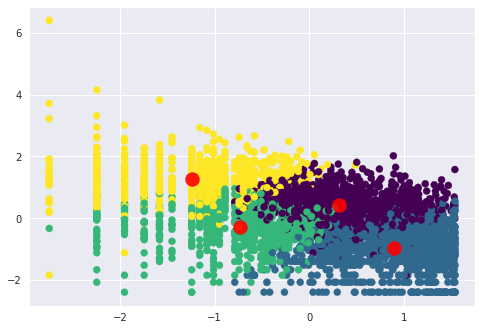

In [198]:
plt.scatter(rfm_normalized.iloc[:, 0], rfm_normalized.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9);

In [199]:
cluster_labels = kmeans.labels_
rfm_k4 = rfm.assign(Cluster=cluster_labels)
rfm_k4.sample(15)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level,Cluster
CustomerID,,,,,,,,,
16634.0,222,9,217.90,1,1,1,3,Low,1
15452.0,29,56,528.48,3,3,2,8,High,2
17491.0,1,109,3558.87,4,4,4,12,Top Class,3
17330.0,22,6,363.90,3,1,2,6,Middle,2
14064.0,29,77,1334.34,3,3,3,9,High,0
15898.0,1,84,1383.83,4,3,3,10,High,3
13621.0,116,19,213.85,2,2,1,5,Low,1
18062.0,173,27,720.52,1,2,3,6,Middle,0
13598.0,47,35,160.04,3,2,1,6,Middle,2


In [200]:
grouped = rfm_k4.groupby(['Cluster'])
avg_df=grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)
avg_df

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         88.20     82.80       1494.70  1147
1        186.80     15.20        291.70  1256
2         20.40     35.10        551.70   769
3         11.00    452.60       8673.90   749

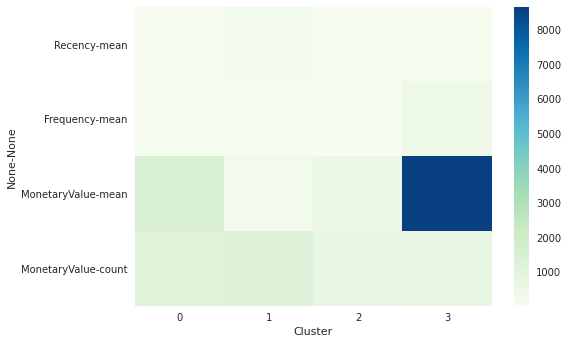

In [201]:
sns.heatmap(avg_df.T, cmap="GnBu")

In [202]:
rfm_normalized = rfm_normalized.assign(Cluster=cluster_labels)
df_melt = pd.melt(rfm_normalized.reset_index(), 
                        
                    id_vars=['CustomerID', 'Cluster'],

                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
                    value_name='Value', var_name='Metric'
					)
print(df_melt.head())

  CustomerID  Cluster   Metric  Value
0    12346.0        0  Recency   1.44
1    12747.0        3  Recency  -1.95
2    12748.0        3  Recency  -2.75
3    12749.0        3  Recency  -1.74
4    12820.0        2  Recency  -1.74


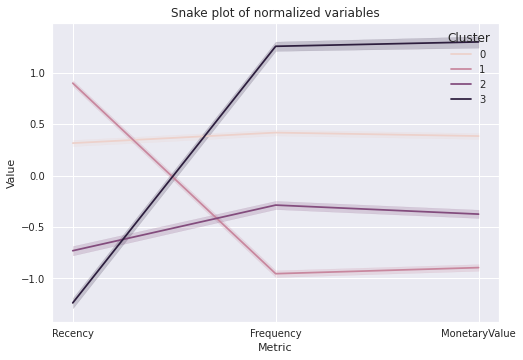

In [203]:
plt.title('Snake plot of normalized variables')
plt.xlabel("Metric")
plt.ylabel("Value")

sns.lineplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [204]:
cluster_avg = rfm_k4.groupby(['Cluster']).mean() 
population_avg = rfm.mean()

relative_imp = cluster_avg / population_avg -1

print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue  RFM_Score
Cluster                                              
0          -0.04      -0.32          -0.35       0.11
1           1.04      -0.88          -0.87      -0.43
2          -0.78      -0.71          -0.76       0.02
3          -0.88       2.70           2.78       0.53


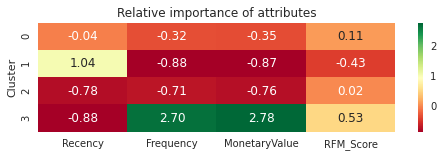

In [205]:
plt.figure(figsize=(8,2))

plt.title('Relative importance of attributes')

sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

2. Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results. 

### iv. Assign the Label

**Conclusion**

- Cluster 0 : The first cluster belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=4), frequent buyers (F=4), and spent the most (M=4)

- Cluster 1 : Second cluster can be interpreted as passer customers as their last purchase is long ago (R<=1),purchased very few (F>=2 & F < 4) and spent little (M>=4 & M < 4).Company has to come up with new strategies to make them permanent members. Low value customers
- Cluster 2 : The third cluster is more related to the "Almost Lost" segment as they Haven’t purchased for some time(R=1), but used to purchase frequently and spent a lot.

### v. Conclusion

Discuss your final results. Compare your own labels from the Customer Segmentation with the labels found by K-Means.

How we want to continue this analysis depends on how the business plans to use the results and the level of granularity the business stakeholders want to see in the clusters. We can also ask what range of customer behavior from high to low value customers are the stakeholders interested in exploring. From those answers, various methods of clustering can be used and applied on RFM variable or directly on the transaction data set.

**Annotation:**

Limitations of K-means clustering:

1. There is no assurance that it will lead to the global best solution.
2. Can't deal with different shapes(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of K-means show that for many datasets (especially low-dimensional datasets), it may not perform as well as you might hope.

# 5. Create Cohort & Conduct Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

Since we will be performing Cohort Analysis based on transaction records of customers, the columns we will be dealing with mainly:
- Invoice Data
- CustomerID
- Price
- Quantity

The following steps will performed to generate the Cohort Chart of Retention Rate:
- Month Extraction from InvioceDate column
- Assigning Cohort to Each Transaction
- Assigning Cohort Index to each transaction
- Calculating number of unique customers in each Group of (ChortDate,Index)
- Creating Cohort Table for Retention Rate
- Creating the Cohort Chart using the Cohort Table

The Detailed information about each step is given below:

## Future Engineering

In [101]:
df_final=df_uk[["InvoiceDate", "CustomerID" , "UnitPrice" , "Quantity"]]

In [102]:
df_final["Sales"]=df.UnitPrice * df.Quantity


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df_final.head()

,InvoiceDate,CustomerID,UnitPrice,Quantity,Sales
0,2010-12-01 08:26:00,17850.0,2.55,6,15.30
1,2010-12-01 08:26:00,17850.0,3.39,6,20.34
2,2010-12-01 08:26:00,17850.0,2.75,8,22.00
3,2010-12-01 08:26:00,17850.0,3.39,6,20.34
4,2010-12-01 08:26:00,17850.0,3.39,6,20.34


In [104]:
def get_month(x):return datetime.datetime(x.year, x.month, 1)
df_final['InvoiceMonth'] = df_final['InvoiceDate'].apply(get_month)
grouping = df_final.groupby('CustomerID')['InvoiceMonth']
df_final['CohortMonth'] = grouping.transform('min')
df_final.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,InvoiceDate,CustomerID,UnitPrice,Quantity,Sales,InvoiceMonth,CohortMonth
0,2010-12-01 08:26:00,17850.0,2.55,6,15.30,2010-12-01,2010-12-01
1,2010-12-01 08:26:00,17850.0,3.39,6,20.34,2010-12-01,2010-12-01
2,2010-12-01 08:26:00,17850.0,2.75,8,22.00,2010-12-01,2010-12-01
3,2010-12-01 08:26:00,17850.0,3.39,6,20.34,2010-12-01,2010-12-01
4,2010-12-01 08:26:00,17850.0,3.39,6,20.34,2010-12-01,2010-12-01


In [105]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [106]:
invoice_year, invoice_month, _ = get_date_int(df_final, 'InvoiceMonth') 
cohort_year, cohort_month, _ = get_date_int(df_final, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
df_final['CohortIndex'] = years_diff * 12 + months_diff + 1
df_final.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,InvoiceDate,CustomerID,UnitPrice,Quantity,Sales,InvoiceMonth,CohortMonth,CohortIndex
0,2010-12-01 08:26:00,17850.0,2.55,6,15.30,2010-12-01,2010-12-01,1
1,2010-12-01 08:26:00,17850.0,3.39,6,20.34,2010-12-01,2010-12-01,1
2,2010-12-01 08:26:00,17850.0,2.75,8,22.00,2010-12-01,2010-12-01,1
3,2010-12-01 08:26:00,17850.0,3.39,6,20.34,2010-12-01,2010-12-01,1
4,2010-12-01 08:26:00,17850.0,3.39,6,20.34,2010-12-01,2010-12-01,1


In [107]:
grouping = df_final.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
print(cohort_counts)

CohortIndex     1      2      3      4   ...     10     11     12     13
CohortMonth                              ...                            
2010-12-01  816.00 290.00 264.00 305.00  ... 326.00 300.00 406.00 219.00
2011-01-01  358.00  76.00  93.00  84.00  ... 117.00 127.00  43.00    nan
2011-02-01  340.00  64.00  66.00  97.00  ... 104.00  25.00    nan    nan
2011-03-01  419.00  64.00 109.00  83.00  ...  38.00    nan    nan    nan
2011-04-01  277.00  58.00  56.00  60.00  ...    nan    nan    nan    nan
2011-05-01  256.00  48.00  44.00  44.00  ...    nan    nan    nan    nan
2011-06-01  214.00  38.00  31.00  51.00  ...    nan    nan    nan    nan
2011-07-01  169.00  30.00  33.00  39.00  ...    nan    nan    nan    nan
2011-08-01  141.00  32.00  32.00  34.00  ...    nan    nan    nan    nan
2011-09-01  276.00  63.00  83.00  32.00  ...    nan    nan    nan    nan
2011-10-01  324.00  79.00  36.00    nan  ...    nan    nan    nan    nan
2011-11-01  297.00  35.00    nan    nan  ...    nan

Retention


In [108]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.00,35.50,32.40,37.40,36.00,39.70,35.80,34.20,35.50,40.00,36.80,49.80,26.80
2011-01-01,100.00,21.20,26.00,23.50,33.20,27.70,25.10,24.30,30.20,32.70,35.50,12.00,nan
2011-02-01,100.00,18.80,19.40,28.50,28.80,25.30,25.60,28.20,26.50,30.60,7.40,nan,nan
2011-03-01,100.00,15.30,26.00,19.80,22.40,16.50,26.50,22.90,28.40,9.10,nan,nan,nan
2011-04-01,100.00,20.90,20.20,21.70,20.20,22.00,22.00,26.40,7.20,nan,nan,nan,nan
2011-05-01,100.00,18.80,17.20,17.20,20.70,22.70,26.60,9.00,nan,nan,nan,nan,nan
2011-06-01,100.00,17.80,14.50,23.80,23.80,32.20,9.80,nan,nan,nan,nan,nan,nan
2011-07-01,100.00,17.80,19.50,23.10,27.80,10.70,nan,nan,nan,nan,nan,nan,nan
2011-08-01,100.00,22.70,22.70,24.10,12.10,nan,nan,nan,nan,nan,nan,nan,nan


In [109]:
grouping = df_final.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex',values='Quantity')
average_quantity.round(1)


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,8.10,6.90,8.40,8.90,8.70,8.80,8.80,7.80,10.50,10.40,10.40,8.50,8.40
2011-01-01,18.10,9.60,9.40,15.10,10.10,10.90,13.60,10.80,10.80,8.70,8.60,10.00,nan
2011-02-01,11.00,14.00,16.00,12.10,12.30,11.90,13.90,13.70,11.00,12.50,13.80,nan,nan
2011-03-01,9.70,11.40,13.30,10.10,13.50,12.80,13.10,14.10,11.20,9.70,nan,nan,nan
2011-04-01,10.10,10.20,9.70,11.90,11.90,8.30,9.90,9.40,7.50,nan,nan,nan,nan
2011-05-01,10.70,9.40,14.90,12.80,11.00,8.30,10.80,126.90,nan,nan,nan,nan,nan
2011-06-01,9.50,14.80,12.00,12.70,9.80,8.90,9.40,nan,nan,nan,nan,nan,nan
2011-07-01,10.10,15.00,6.60,8.10,5.80,6.70,nan,nan,nan,nan,nan,nan,nan
2011-08-01,9.40,6.00,5.00,5.90,6.60,nan,nan,nan,nan,nan,nan,nan,nan


### ii. Visualize analysis of cohort 1 using seaborn and matplotlib modules

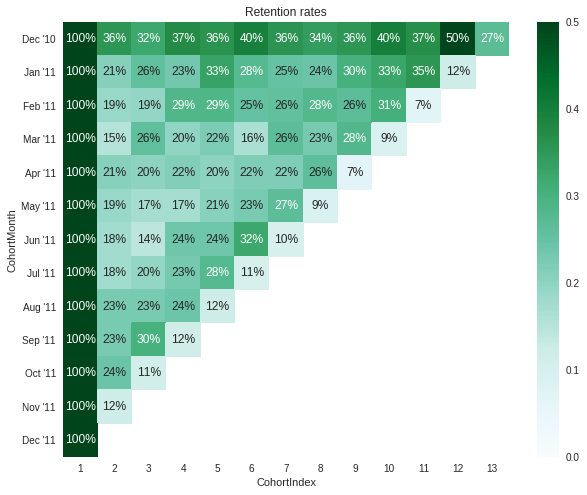

In [114]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.0,vmax = 0.5, cmap = 'BuGn', yticklabels=month_list)
plt.show()

## Create the 2nd Cohort: Average Quantity Sold

### i. Pivot Cohort and Cohort Retention

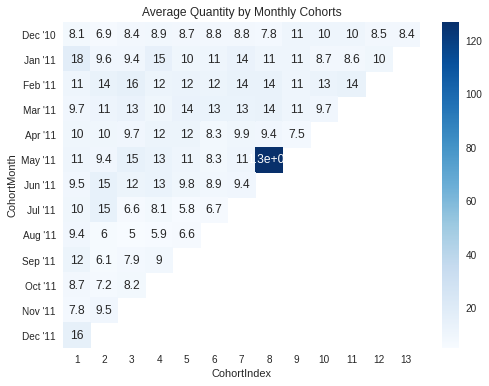

In [115]:
plt.figure(figsize=(8,6))
plt.title('Average Quantity by Monthly Cohorts')
sns.heatmap(average_quantity, annot=True, cmap='Blues', yticklabels=month_list)
plt.show()

In [112]:
sales_data = grouping['Sales'].mean()
sales_data = sales_data.reset_index()
sales_volume = sales_data.pivot(index='CohortMonth', columns='CohortIndex',values='Sales')
sales_volume.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,19.30,14.50,17.50,19.10,16.10,19.80,18.80,16.40,21.40,22.80,22.30,20.10,19.50
2011-01-01,26.70,18.80,15.40,28.20,18.60,19.10,24.20,17.80,17.80,17.10,18.00,19.00,nan
2011-02-01,17.00,20.10,19.40,19.20,17.60,16.10,21.30,23.00,18.20,22.00,23.90,nan,nan
2011-03-01,16.70,20.20,22.70,17.70,20.60,18.40,20.70,19.80,16.50,13.10,nan,nan,nan
2011-04-01,16.60,20.10,19.20,18.70,19.10,14.10,14.90,15.30,11.50,nan,nan,nan,nan
2011-05-01,18.10,17.00,22.00,21.10,18.70,13.50,16.70,261.80,nan,nan,nan,nan,nan
2011-06-01,22.90,15.20,19.60,16.60,13.30,13.30,12.70,nan,nan,nan,nan,nan,nan
2011-07-01,14.90,24.70,10.30,12.90,9.30,9.40,nan,nan,nan,nan,nan,nan,nan
2011-08-01,15.20,13.00,12.10,15.60,17.10,nan,nan,nan,nan,nan,nan,nan,nan


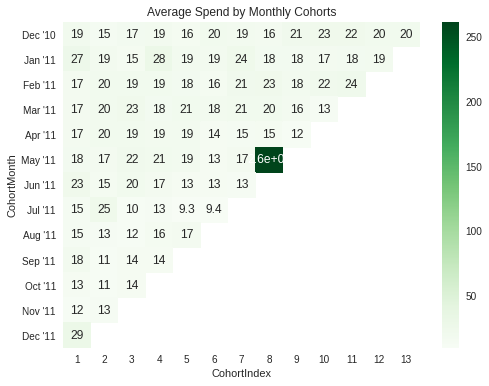

In [116]:
plt.figure(figsize=(8,6))
plt.title('Average Spend by Monthly Cohorts')
sns.heatmap(sales_volume, annot=True, cmap='Greens', yticklabels=month_list)
plt.show()